In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
import seaborn as sns #graficas y estadistica



from sklearn.model_selection import train_test_split # pro ahor an
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os #sistema op



In [7]:

os.chdir('C:/Users/Julian/Documents/MMA/PYTHONLUZ')
cwd=os.getcwd() # asigan variable swd al directorio
xls_file = "Colombia-Feb21.xlsx"


# TOMANDO LOS DATOS DE LOS EQUIPOS

df = pd.read_excel(xls_file, header= 0, sep=';')

In [9]:
df.head(10)

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","MedellÃ­n, Antioquia, Colombia",La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
1,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"BogotÃ¡, Distrito Especial, Colombia",Get what you want giving what you have,1.258,2019-04-01 00:00:00,day,2021-01-19 00:00:00,2100000,USD,2100000.0,2100000,USD,2100000.0
2,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","BogotÃ¡, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
3,Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...","BogotÃ¡, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
4,Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
5,Rappi,https://www.crunchbase.com/organization/rappi,"Consumer Goods, E-Commerce, Food Delivery","BogotÃ¡, Distrito Especial, Colombia",Rappi is a consumer tech company that speciali...,6.377,2015-01-01 00:00:00,year,2020-09-24 00:00:00,300000000,USD,300000000.0,300000000,USD,300000000.0
6,Valiu,https://www.crunchbase.com/organization/valiu,"Cryptocurrency, Finance, Financial Services, F...","BogotÃ¡, Distrito Especial, Colombia",Valiu is a developing a digital remittance pla...,7.15,2018-09-17 00:00:00,day,2020-12-04 00:00:00,5250000,USD,5250000.0,5250000,USD,5250000.0
7,RobinFood,https://www.crunchbase.com/organization/muy,"Food and Beverage, Food Delivery, Restaurants,...","BogotÃ¡, Distrito Especial, Colombia",RobinFood is an operator of a chain of restaur...,7.452,2018-03-01 00:00:00,month,2020-10-02 00:00:00,16000000,USD,16000000.0,15000000,USD,15000000.0
8,Habi,https://www.crunchbase.com/organization/habi-fefd,"Home Renovation, Real Estate, Real Estate Inve...","BogotÃ¡, Distrito Especial, Colombia",Habi is a digital platform that aims to simpli...,7.768,2019-07-01 00:00:00,month,2020-08-26 00:00:00,10000000,USD,10000000.0,10000000,USD,10000000.0
9,Merqueo,https://www.crunchbase.com/organization/merqueo,"Delivery, E-Commerce, Food and Beverage, Grocery","BogotÃ¡, Distrito Especial, Colombia",Merqueo is an online-based grocery delivery in...,8.492,2015-11-01 00:00:00,day,2019-02-10 00:00:00,14000000,USD,14000000.0,14000000,USD,14000000.0


In [16]:
df = df.drop(['Organization Name URL'], axis=1)

In [17]:
df

,Organization Name,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
0,La Haus,"Information Technology, Marketplace, Real Esta...","MedellÃ­n, Antioquia, Colombia",La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
1,Dondo,NaN,"BogotÃ¡, Distrito Especial, Colombia",Get what you want giving what you have,1.258,2019-04-01 00:00:00,day,2021-01-19 00:00:00,2100000,USD,2100000.0,2100000,USD,2100000.0
2,Aflore,"Credit, Finance, Financial Services, FinTech","BogotÃ¡, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
3,Liftit,"Freight Service, Internet, Last Mile Transport...","BogotÃ¡, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
4,Chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Paperplane,"Social Media, Web Apps, Web Development","BogotÃ¡, Distrito Especial, Colombia",Paperplane is a web development company specia...,755.646,2012-11-01 00:00:00,month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Dequr.com,"Consumer Reviews, Customer Service, Online Forums","MedellÃ­n, Antioquia, Colombia",Dequr.com quejas y reclamos en Internet,757.737,2010-10-14 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,GGBOX,"Fitness, Health Care, Wellness","Madrid, Distrito Especial, Colombia",GGBOX is a monthly selection of vaping liquids...,759.176,2017-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Ninus,"Information Technology, Product Design, Produc...","Cali, Valle del Cauca, Colombia",Design and technology made by young Colombian ...,760.213,2015-11-30 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df= df.replace({"BogotÃ¡, Distrito Especial, Colombia": "Bogotá", "MedellÃn, Antioquia, Colombia" : "Medellín"})
df

,Organization Name,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
0,La Haus,"Information Technology, Marketplace, Real Esta...",Medellín,La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
1,Dondo,NaN,Bogotá,Get what you want giving what you have,1.258,2019-04-01 00:00:00,day,2021-01-19 00:00:00,2100000,USD,2100000.0,2100000,USD,2100000.0
2,Aflore,"Credit, Finance, Financial Services, FinTech",Bogotá,Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
3,Liftit,"Freight Service, Internet, Last Mile Transport...",Bogotá,Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
4,Chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Paperplane,"Social Media, Web Apps, Web Development",Bogotá,Paperplane is a web development company specia...,755.646,2012-11-01 00:00:00,month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Dequr.com,"Consumer Reviews, Customer Service, Online Forums",Medellín,Dequr.com quejas y reclamos en Internet,757.737,2010-10-14 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,GGBOX,"Fitness, Health Care, Wellness","Madrid, Distrito Especial, Colombia",GGBOX is a monthly selection of vaping liquids...,759.176,2017-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Ninus,"Information Technology, Product Design, Produc...","Cali, Valle del Cauca, Colombia",Design and technology made by young Colombian ...,760.213,2015-11-30 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df2=df.dropna()
df2

,Organization Name,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
0,La Haus,"Information Technology, Marketplace, Real Esta...",Medellín,La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0
2,Aflore,"Credit, Finance, Financial Services, FinTech",Bogotá,Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0
3,Liftit,"Freight Service, Internet, Last Mile Transport...",Bogotá,Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0
4,Chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0
5,Rappi,"Consumer Goods, E-Commerce, Food Delivery",Bogotá,Rappi is a consumer tech company that speciali...,6.377,2015-01-01 00:00:00,year,2020-09-24 00:00:00,300000000,USD,300000000.0,300000000,USD,300000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Geelbe,"Brand Marketing, E-Commerce, Fashion, Nightclu...",Bogotá,Geelbe is a private internet purchasing club p...,318.399,2008-01-01 00:00:00,year,2009-12-11 00:00:00,3200000,USD,3200000.0,3200000,USD,3200000.0
466,Icanbesponsored,Sports,Bogotá,Icanbesponsored is an online company that enab...,323.92,2012-01-01 00:00:00,year,2012-08-10 00:00:00,1000,USD,1000.0,1000,USD,1000.0
553,Milmenus.com,"Mobile, Restaurants",Bogotá,Milmenus is a Colombia-based restaurant menu g...,382.158,2010-06-07 00:00:00,day,2010-06-07 00:00:00,7500,USD,7500.0,7500,USD,7500.0
748,LatinMedios,"Advertising, App Marketing, Digital Media, Sem...",Bogotá,LatinMedios is a digital marketing agency serv...,516.177,2008-08-26 00:00:00,day,2008-09-01 00:00:00,75000,USD,75000.0,75000,USD,75000.0


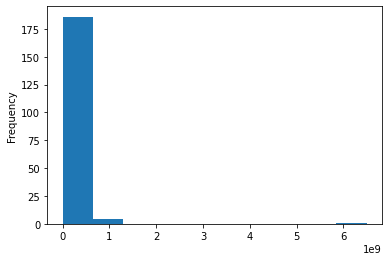

In [57]:
df2["Last Funding Amount"].plot(kind="hist")
plt.show()

In [67]:
df2.iloc[:, 8]





0       35000000
2        6500000
3       22500000
4       12000000
5      300000000
         ...    
457      3200000
466         1000
553         7500
748        75000
787        11934
Name: Last Funding Amount, Length: 191, dtype: object